# Índices Educación Superior Periodo 2005-2023

## I. Introducción
La educación es uno de los pilares de la sociedad, por tanto se hace interesante comprender cómo se relacionan algunos de sus indicadores y de que forma influyen unos con otros ¿existirá una relación entre el puntaje de corte de una carrera y su costo en arancel? ¿podemos agrupar carreras y universidades según su información de matrícula?

Se posee una base de datos histórica de educación superior que cuenta con registros desde 2005 a 2023 y que exploraremos a continuación.

## II.Exploración de datos

### Distribuciones importantes

En primer lugar, se decide contabilizar el porcentaje de registros correspondientes a carreras de pregrado y postgrado, resultando en un 83.8% y 16.2% respectivamente.

![Distribución de registros con respecto a la columna Pregrado/Posgrado](./outputs/dist.png)


Por otra parte, la distribución de estudiantes por regiones es la siguiente:

![Distribución de estudiantes por regiones](./outputs/count_students.png)

Aunque pudiese ser predecible, se evidencia una alta cantidad de estudiantes en la Región Metropolitana, seguida por Valparaíso y Biobío. 

En cuanto a la cantidad de estudiantes por tipo de carrera, se observa que la mayoría de los estudiantes se encuentran en carreras de tipo técnicas, seguidas por profesional con licenciatura y carreras profesionales.

![Distribución de estudiantes por tipo de carrera](./outputs/count_students_degree.png)

Agrupando las carreras por sector de conocimiento, se puede observar una gran presencia de estudiantes en carreras tecnológicas, seguidas por el área de administración y comercio. En tercer puesto, encontramos el área de salud que es casi equiparada por el área de educación.

![Distribución de estudiantes por sector de conocimiento](./outputs/count_students_area.png)

Por el lado de las estadísticas relacionadas al ingreso a estas carreras tenemos el promedio del puntaje obtenido en las pruebas de matemáticas y lenguaje. 
Los resultados registrados entre los años 2005 y 2019 corresponden a la prueba de selección universitaria PSU, con un puntaje mínimo de 150 puntos y un máximo de 850 puntos. Los siguientes 3 años corresponden a resultados de la prueba de transición universitaria PTU, mientras que el último año registrado corresponde a la nueva prueba de acceso a la educación superior PAES, cuyo rango de puntajes va desde los 100 hasta los 1.000 puntos.

A continuación se observa la distribución de los puntajes, donde se puede apreciar que en el caso de la PSU la mayoría de los estudiantes obtienen puntajes entre 400 y 700 puntos en ambas pruebas (esto ya que la escala de cada una de las pruebas de la PSU estaba estandarizado, con una media de 500 puntos y una desviación estándar de 110).


![Distribución de puntajes PSU](./outputs/psu.png)

![Distribución de puntajes PSU](./outputs/paes.png)

### Análisis de las columnas

En esta exploración notamos que hay columnas que de por sí no nos entregan información relevante en cuanto a puntajes se refiere o que podrían interferir con la generación de clusters a futuro, como el orden geografico de la región, el idgenerocarrera (información demasiado específica) o el Código SIES. 

También la información referente a puntajes mínimos y máximos de ingreso es insuficiente (tienen una alta tasa de nulos), por lo que solo mantendremos la columna 'Promedio Puntaje (promedio matemáticas y lenguaje)' de las pruebas de ingreso. Las menciones o especialidades no están presentes en todas las carreras y la columna con el nombre del campus tiene una tasa de nulos del 57%, por lo que tampoco se considerarán en el análisis.

Por otro lado, existen 6 columnas llamadas "Clasificación" de las cuales no se tiene mayor información. Dado que podrían ser categorías importantes, se analizan sus datos para determinar a qué corresponden. 

A continuación una explicación de cada una de ellas, comenzando por la clasificación 2 para una mejor comprensión de las demás:

  - Clasificación 2: Corresponde al tipo de universidad: si es CRUCH, Privada, Instituto. FFAA, etc.
  - Clasificación 1: Es una versión menos granular de la clasificación 2, por lo que se decide eliminarla.
  - Clasificación 3: Acreditación de la carrera (Acreditada, No Acreditada)
  - Clasificación 4: Si es una organización autónoma, cerrada, de supervisión, licenciamiento, etc.
  - Clasificación 5: Si está o no adscrita a gratuidad
  - Clasificación 6: Subsistema al que pertenece la carrera

Adicionalmente, existen otras 5 columnas que también podrían ser importantes.
Estas son:
  - Horario: Existen carreras diurnas y vespertinas
  - Tipo Programa: Algunas carreras tienen un programa especial (FFAA)
  - Ingreso Directo: Algunas carreras no tienen ingreso directo (FFAA)
  - Pregrado/Posgrado: El 83% de los registros corresponden a pregrado y el 17% a posgrado
  - Tipo Moneda: Algunas carreras tienen un arancel en UF y otras en pesos


# Anexo

In [1]:
from pathlib import Path
import joblib

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

from pipeline import (
    DropColumns,
    DropHighNAPercentage,
    NormalizeCurrency,
    OrdinalColumnMapper,
)

pd.set_option('display.max_columns', 100)

/Users/isaias/proyecto-mineria-de-datos/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
ROOT_DIR = Path.cwd().parent
DATA_DIR = ROOT_DIR / "data"
assert DATA_DIR.exists()

DATA_PATH = DATA_DIR / "base_indices_2005-2023.xlsx"

In [ ]:
# # xlsx to pkl
df = pd.read_excel(DATA_PATH)
joblib.dump(df, DATA_DIR / 'base_indices.pkl')

In [ ]:
df = joblib.load(DATA_DIR / "base_indices.pkl")
df = df.reset_index()

## Exploración

### Hito 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218773 entries, 0 to 218772
Data columns (total 61 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   index                                               218773 non-null  int64  
 1   Año                                                 218773 non-null  int64  
 2   Cód. Institución                                    218773 non-null  int64  
 3   Nombre Institución                                  218773 non-null  object 
 4   Tipo Institución                                    218773 non-null  object 
 5   Clasificación1                                      218773 non-null  object 
 6   Clasificación2                                      218773 non-null  object 
 7   Clasificación3                                      218773 non-null  object 
 8   Clasificación4                                      218773 non-n

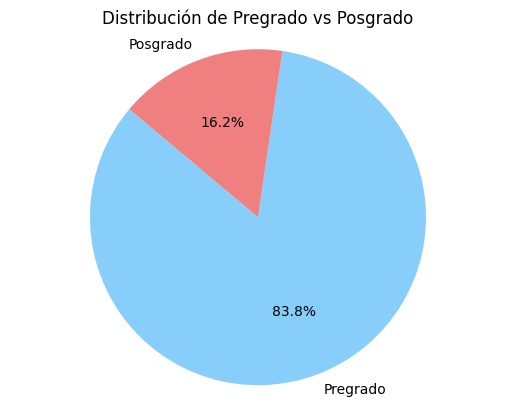

In [ ]:
# Plot distribution of pregrado vs posgrado in a pie chart
conteo_pregrado = df[df['Pregrado/Posgrado'] == 'Pregrado'].shape[0]
conteo_posgrado = df[df['Pregrado/Posgrado'] == 'Posgrado'].shape[0]

# Crear un gráfico de sectores
labels = ['Pregrado', 'Posgrado']
sizes = [conteo_pregrado, conteo_posgrado]
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de Pregrado vs Posgrado')
plt.show()

Text(0.5, 1.0, 'Cantidad de estudiantes por región')

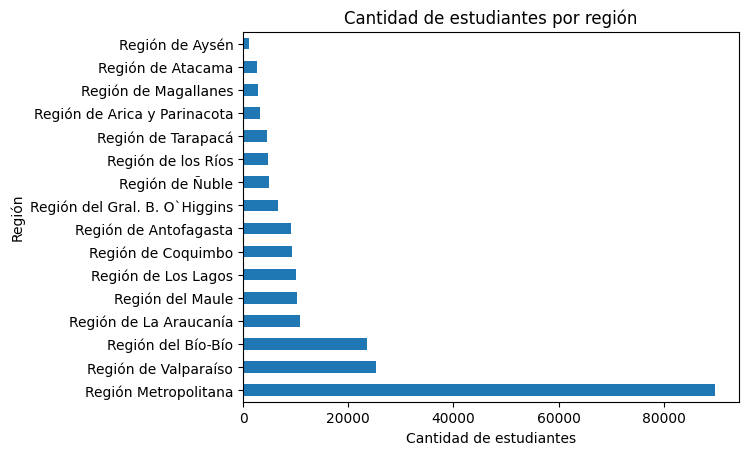

In [ ]:
df['Nombre Region'].value_counts().plot(kind='barh')
plt.ylabel('Región')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por región')

Text(0.5, 1.0, 'Cantidad de estudiantes por tipo de carrera')

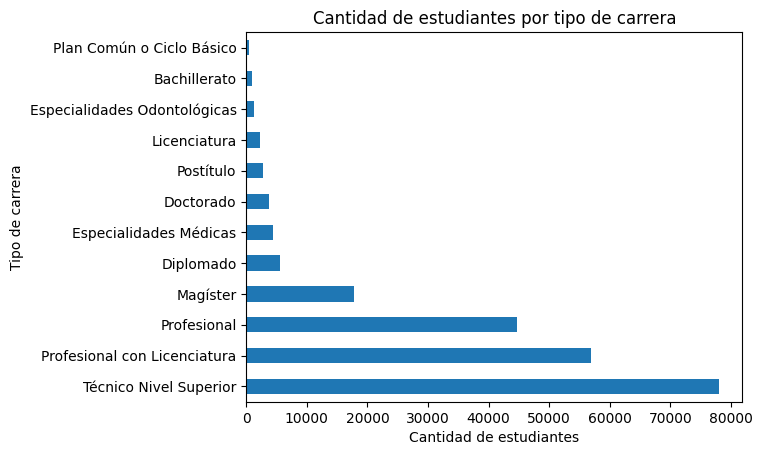

In [ ]:
df['Tipo Carrera'].value_counts().plot(kind='barh')
plt.ylabel('Tipo de carrera')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por tipo de carrera')

Text(0.5, 1.0, 'Cantidad de estudiantes por área de conocimiento')

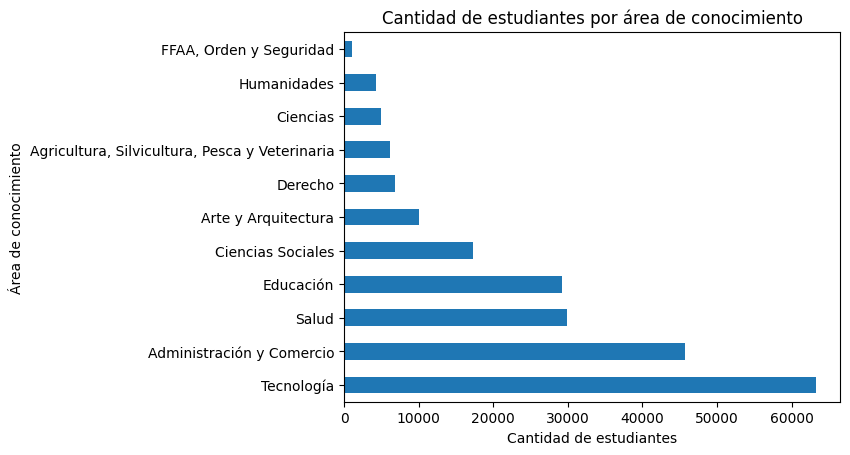

In [ ]:
df['Area Conocimiento'].value_counts().plot(kind='barh')
plt.ylabel('Área de conocimiento')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por área de conocimiento')

In [ ]:
df['Año'] = pd.to_datetime(df['Año'], format='%Y')
df.groupby("Año")['Promedio Puntaje (promedio matemáticas y lenguaje)'].max()

Año
2005-01-01    791.0
2006-01-01    802.0
2007-01-01    791.0
2008-01-01    802.0
2009-01-01    799.0
2010-01-01    802.0
2011-01-01    805.0
2012-01-01    817.0
2013-01-01    784.0
2014-01-01    779.0
2015-01-01    789.0
2016-01-01    781.0
2017-01-01    787.0
2018-01-01    796.0
2019-01-01    786.0
2020-01-01    784.0
2021-01-01    784.0
2022-01-01    786.0
2023-01-01    961.0
Name: Promedio Puntaje (promedio matemáticas y lenguaje), dtype: float64

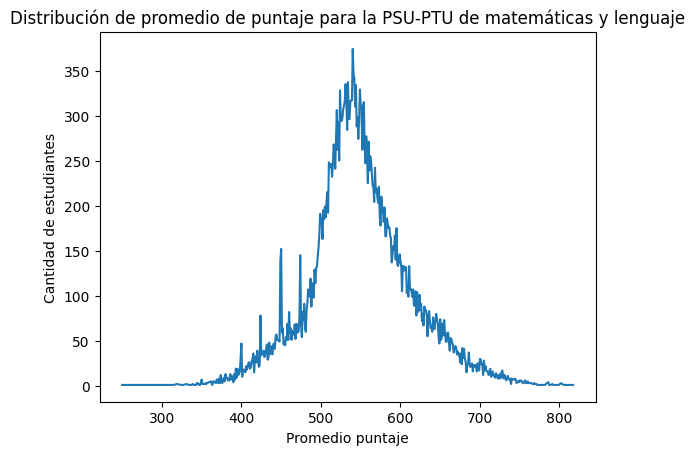

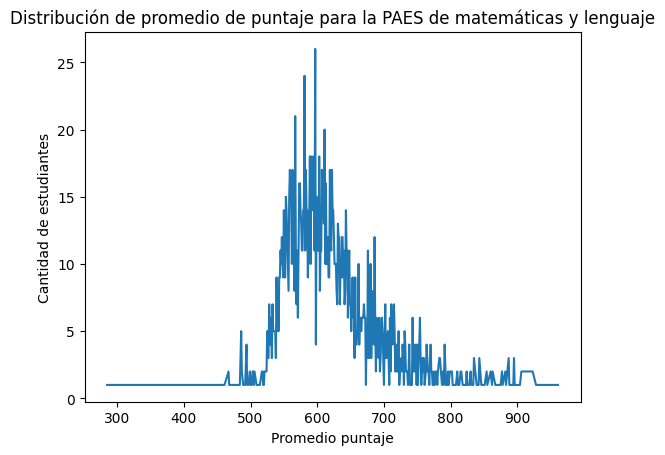

In [ ]:
# Datos PSU y PTU
datos_puntaje_PSU_PTU=df[df['Año'].dt.year<2023]['Promedio Puntaje (promedio matemáticas y lenguaje)'].value_counts().sort_index().plot()
plt.xlabel("Promedio puntaje")
plt.ylabel("Cantidad de estudiantes")
plt.title("Distribución de promedio de puntaje para la PSU-PTU de matemáticas y lenguaje")
plt.show()

# Datos PAES
datos_puntaje_PAES=df[(df['Año'].dt.year>=2023)]['Promedio Puntaje (promedio matemáticas y lenguaje)'].value_counts().sort_index().plot()
plt.xlabel("Promedio puntaje")
plt.ylabel("Cantidad de estudiantes")
plt.title("Distribución de promedio de puntaje para la PAES de matemáticas y lenguaje")

plt.show()

### Hito 2

In [ ]:
df['Orden Geográfico de la Región (Norte aSur)'].value_counts()

Orden Geográfico de la Región (Norte aSur)
7     89781
6     25249
10    23490
12    10871
9     10227
14    10157
5      9244
3      9183
8      6636
11     4916
13     4698
2      4563
1      3217
16     2776
4      2712
15     1053
Name: count, dtype: int64

In [ ]:
# show percentage of null values in Mención o Especialidad
df['Mención o Especialidad'].isnull().sum() / df.shape[0]

0.8597633163141704

In [ ]:
# show unique values in idgenerocarrera
df['idgenerocarrera'].value_counts()

idgenerocarrera
1010502    7408
1009500    5670
1010006    5536
1008039    4657
1004006    4575
           ... 
1005004       1
2030005       1
1008061       1
1008529       1
1009511       1
Name: count, Length: 325, dtype: int64

In [ ]:

df['Códgo SIES'].value_counts()

Códgo SIES
I430S10C175J1V1    51
I430S10C134J1V1    48
I430S10C43J2V1     43
I430S10C43J1V1     42
I430S10C51J1V1     42
                   ..
I1S1C7J4V4          1
I143S20C645J1V1     1
I1S1C7J2V4          1
I1S1C20J4V4         1
I143S26C707J2V1     1
Name: count, Length: 15768, dtype: int64

In [ ]:
# show percentage of null values in each column and sort them in descending order
nulls = df.isnull().sum() / len(df) * 100
nulls.sort_values(ascending=False)


Mínimo Puntaje Ranking      91.340796
Máximo Puntaje Ranking      91.334854
Promedio Puntaje Ranking    91.269489
Mínimo Puntaje NEM          90.884158
Máximo Puntaje NEM          90.878216
                              ...    
idgenerocarrera              0.000000
Tipo Carrera                 0.000000
IngresoDirecto               0.000000
Año Inicio Actividades       0.000000
Pregrado/Posgrado            0.000000
Length: 61, dtype: float64

In [ ]:
interes1 = [
    "Clasificación1",
    "Clasificación2",
    "Clasificación3",
    "Clasificación4",
    "Clasificación5",
    "Clasificación6",
]
for column in interes1:
    print(f"Valores únicos de la columna {column}: \n \n{df[column].unique()} \n ")

interes2 = [
    "Horario",
    "Tipo Programa",
    "IngresoDirecto",
    "Tipo Moneda",
    "Pregrado/Posgrado",
]
for column in interes2:
    print(f"Valores únicos de la columna {column}: \n \n{df[column].unique() } \n ")


Valores únicos de la columna Clasificación1: 
 
['(a) Universidades CRUCH' '(b) Universidades Privadas'
 '(c) Institutos Profesionales' '(d) Centros de Formación Técnica'
 '(e) Centros de Formación Técnica Estatales' '(f) F.F.A.A.'] 
 
Valores únicos de la columna Clasificación2: 
 
['(a) Universidades Estatales CRUCH' '(b) Universidades Privadas CRUCH'
 '(d) Universidades Privadas' '(c) Univ. Privadas Adscritas SUA'
 '(e) Institutos Profesionales' '(f) Centros de Formación Técnica'
 '(g) Centros de Formación Técnica Estatales' '(h) F.F.A.A.'] 
 
Valores únicos de la columna Clasificación3: 
 
['(a) Acreditada' '(b) No Acreditada'] 
 
Valores únicos de la columna Clasificación4: 
 
['(a) Autónoma' '(e) Cerrada' '(b) Licenciamiento' '(e) F.F.A.A.'
 '(c) Examinación' '(d) Supervisión'] 
 
Valores únicos de la columna Clasificación5: 
 
['(a) Adscritas a Gratuidad' '(b) No Adscritas/No Aplica'] 
 
Valores únicos de la columna Clasificación6: 
 
['(a) Subsistema Universitario' '(c) No adsc